In [54]:
%load_ext autoreload
%autoreload

import csv
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Bllod pressure data sets locations
BLOODPRESS_DATA_LOC='../datasets/bloodpress/bloodpress.txt'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Get the data
data =[]
with open (BLOODPRESS_DATA_LOC, 'r') as f:
    data.append([row for row in csv.reader(f,delimiter='\t')])
bloodpress_df = pd.DataFrame(data[0][1:], columns=data[0][0])
bloodpress_df=bloodpress_df.astype(float)
bloodpress_df.head()

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1.0,105.0,47.0,85.4,1.75,5.1,63.0,33.0
1,2.0,115.0,49.0,94.2,2.10,3.8,70.0,14.0
2,3.0,116.0,49.0,95.3,1.98,8.2,72.0,10.0
3,4.0,117.0,50.0,94.7,2.01,5.8,73.0,99.0
4,5.0,112.0,51.0,89.4,1.89,7.0,72.0,95.0


             Age    Weight       BSA       Dur     Pulse    Stress
Age     1.000000  0.407349  0.378455  0.343792  0.618764  0.368224
Weight  0.407349  1.000000  0.875305  0.200650  0.659340  0.034355
BSA     0.378455  0.875305  1.000000  0.130540  0.464819  0.018446
Dur     0.343792  0.200650  0.130540  1.000000  0.401514  0.311640
Pulse   0.618764  0.659340  0.464819  0.401514  1.000000  0.506310
Stress  0.368224  0.034355  0.018446  0.311640  0.506310  1.000000


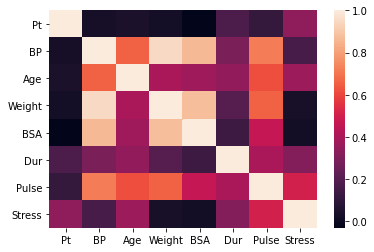

In [27]:
bloodpress__df_corr = bloodpress_df[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']].corr()
sns.heatmap(bloodpress_df.corr())
print(bloodpress__df_corr)

In [51]:
X = bloodpress_df[['Age', 'Weight', 'Dur', 'Pulse', 'Stress']]
X = add_constant(X)
                  
vif =pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.drop(0)

,VIF Factor,features
1,1.659637,Age
2,2.256150,Weight
3,1.235620,Dur
4,3.599913,Pulse
5,1.739641,Stress


In [55]:
X = PCA.fit_transform(bloodpress_df[['Age', 'Weight', 'Dur', 'Pulse', 'Stress']])
X

TypeError: fit_transform() missing 1 required positional argument: 'X'